In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import signal
from numpy.fft import fft, rfft, ifft
from audlib.sig.fbanks import Gammatone
from audlib.plot import magresp
plt.rc('text', usetex=True)

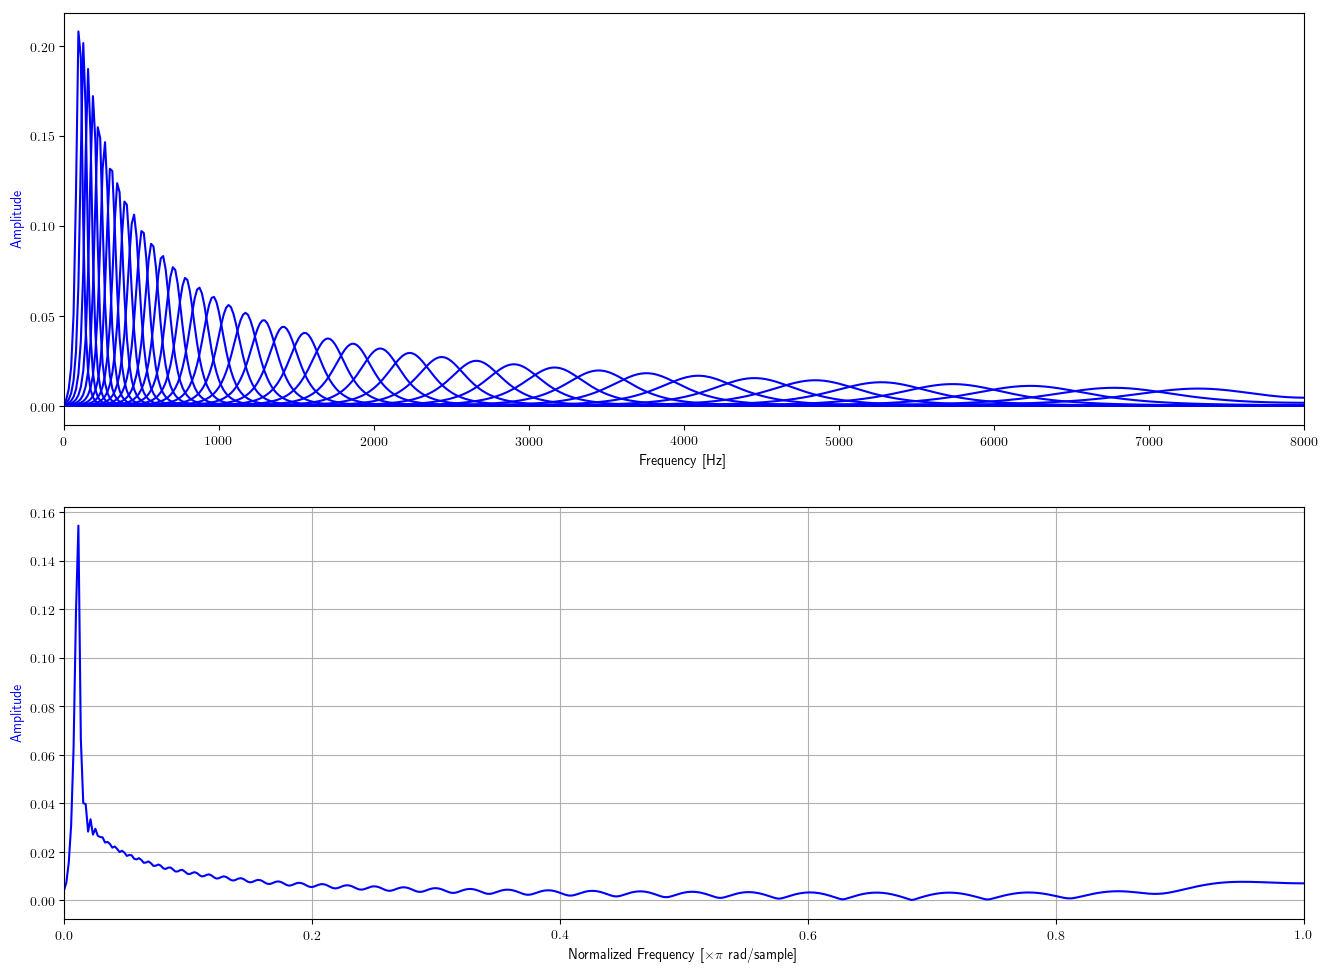

In [4]:
sr = 16000
nfft = 2**10
nyquist = nfft//2+1  # Boundary for Nyquist frequency
num_chans = 40
gtbank = Gammatone(sr, num_chans)

### Plot filter responses
fig = plt.figure(figsize=(16, 12), dpi= 100)
ax1 = fig.add_subplot(211)

total = np.zeros((nyquist), dtype=np.complex_)
for kk in range(len(gtbank)):
    ww, hh = gtbank.freqz(kk, nfft=nfft, powernorm=True)
    total += hh[:nyquist]
    magresp(ww[:nyquist]*(sr/2), hh[:nyquist], ax1, units=('hz', 'mag'))

# Plot total filter response
ax2 = fig.add_subplot(212)
magresp(ww[:nyquist], total, ax2, units=('rad', 'mag'))

The implementation is a direct translation of Malcolm Slaney's `ERBFilteBank` and `MakeERBFilters` in the *Auditory Toolbox*. Below is a 40-channel Gammatone filterbank extracted using his MATLAB code:

![](https://filedn.com/lx3TheNX5ifLtAEMJg2YxFh/sn/pyaudlib/gammatone40.png)

(129, 40)


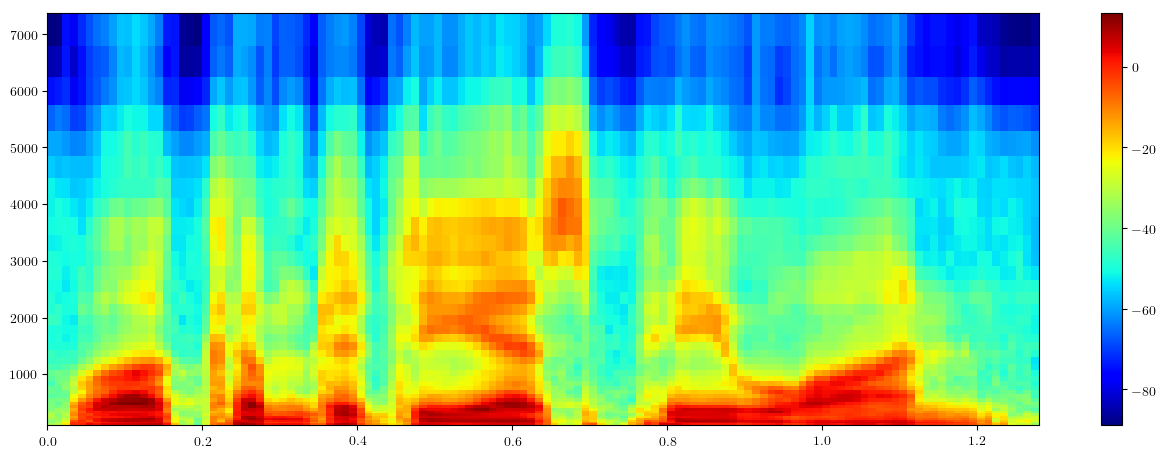

In [10]:
# Obtain Gammatone-weighted short-time power spectr
from audlib.quickstart import welcome
from audlib.sig.transform import stpowspec
from audlib.sig.window import hamming
from audlib.plot import specgram

sig, sr = welcome()
wlen = .025
hop = .01
nfft = 1024
wind = hamming(int(wlen*sr))
powerspec = stpowspec(sig, wind, int(hop*sr), nfft, synth=False)

wts = gtbank.gammawgt(nfft, powernorm=True, squared=True)
gammaspec = powerspec @ wts
print(gammaspec.shape)

fig = plt.figure(figsize=(16, 12), dpi= 100)
ax1 = fig.add_subplot(211)
specgram(10*np.log10(gammaspec), ax1, time_axis=np.arange(gammaspec.shape[0])*hop, freq_axis=gtbank.cf)